●	Personalización - segmentación de mails con creatividades distintas según variables sociodemográficas.
Para mejorar la eficacia de la acción de marketing, y teniendo en cuenta el pedido del departamento de Marketing, hemos hecho otro clustering en función de variables sociodemográficas de los clientes (como edad, ingresos, etc) para segmentar los 10 mil emails con distintas creatividades.
Las variables que tuvimos en cuenta para este modelo de K-Means que nos permite segmentar fueron:
-	edad
-	salario
-	región (por población)
-	género

In [ ]:
# Aquí iria el codigo para conectarse a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
# Importing
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
ruta = '/content/drive/MyDrive/Nuclio/Capstone/K - means2'

In [ ]:
df = pd.read_pickle( ruta + '/' + 'df_kmeans2_last_10000')

In [ ]:
df_sociodemographic = pd.read_pickle( ruta + '/' + 'df_sociodemographic')

In [ ]:
df.head(5)

,tiene_financiacion,Prediction,ProbConFinanciacion,pk_cid,pk_partition
pk_unico,,,,,
101603120190528,0,0,0.114286,1016031,20190528
101738020190528,1,1,0.114286,1017380,20190528
101512220190528,0,1,0.114286,1015122,20190528
101142720190528,0,1,0.114286,1011427,20190528
100373620190528,0,0,0.114286,1003736,20190528


In [ ]:
df.shape

(10000, 5)

In [ ]:
df_sociodemographic.head(5)

,entry_channel,active_customer,segment,country_id,age,salary,Population_region,Population_country,deseased,gender_H,tiene_financiacion,client_since,Season,Year,Month,Week,Weekday
pk_unico,,,,,,,,,,,,,,,,,
158910020180728,KAT,1.0,03 - UNIVERSITARIO,ES,59,88654.65,6751251,46754778,0,1,0,304,3,2018,7,30,5
162030020190128,KAT,1.0,02 - PARTICULARES,ES,70,88654.65,5714730,46754778,0,0,0,156,1,2019,1,5,0
162030020190228,KAT,1.0,01 - TOP,ES,70,88654.65,5714730,46754778,0,0,0,156,1,2019,2,9,3
162030020190328,KAT,1.0,01 - TOP,ES,70,88654.65,5714730,46754778,0,0,0,156,1,2019,3,13,3
162030020190428,KAT,1.0,01 - TOP,ES,70,88654.65,5714730,46754778,0,0,0,156,2,2019,4,17,6


In [ ]:
df_sociodemographic.shape

(4841417, 17)

In [ ]:
# Creamos las variables de pk_cid y pk_partition para proceder a eliminar duplicados

df_sociodemographic['pk_unico']= df_sociodemographic.index

In [ ]:
df_sociodemographic['pk_cid']= df_sociodemographic.index.astype('str').str[:7]

In [ ]:
df_sociodemographic['pk_partition']=df_sociodemographic.index.astype('str').str[-8:]

In [ ]:
df_sociodemographic.head()

,entry_channel,active_customer,segment,country_id,age,salary,Population_region,Population_country,deseased,gender_H,tiene_financiacion,client_since,Season,Year,Month,Week,Weekday,pk_unico,pk_cid,pk_partition
pk_unico,,,,,,,,,,,,,,,,,,,,
158910020180728,KAT,1.0,03 - UNIVERSITARIO,ES,59,88654.65,6751251,46754778,0,1,0,304,3,2018,7,30,5,158910020180728,1589100,20180728
162030020190128,KAT,1.0,02 - PARTICULARES,ES,70,88654.65,5714730,46754778,0,0,0,156,1,2019,1,5,0,162030020190128,1620300,20190128
162030020190228,KAT,1.0,01 - TOP,ES,70,88654.65,5714730,46754778,0,0,0,156,1,2019,2,9,3,162030020190228,1620300,20190228
162030020190328,KAT,1.0,01 - TOP,ES,70,88654.65,5714730,46754778,0,0,0,156,1,2019,3,13,3,162030020190328,1620300,20190328
162030020190428,KAT,1.0,01 - TOP,ES,70,88654.65,5714730,46754778,0,0,0,156,2,2019,4,17,6,162030020190428,1620300,20190428


In [ ]:
# Eliminamos duplicados del df sociodemographic

df_sociodemographic.drop_duplicates(subset = 'pk_cid', keep='last',inplace=True)

In [ ]:
# Chequeamos un caso que tenia duplicados y ahora esta OK

df_sociodemographic[df_sociodemographic['pk_cid'] == '1620300']

,entry_channel,active_customer,segment,country_id,age,salary,Population_region,Population_country,deseased,gender_H,tiene_financiacion,client_since,Season,Year,Month,Week,Weekday,pk_unico,pk_cid,pk_partition
pk_unico,,,,,,,,,,,,,,,,,,,,
162030020190528,KAT,1.0,01 - TOP,ES,70,88654.65,5714730,46754778,0,0,0,156,2,2019,5,22,1,162030020190528,1620300,20190528


In [ ]:
df_sociodemographic[df_sociodemographic['pk_cid'].duplicated()]

,entry_channel,active_customer,segment,country_id,age,salary,Population_region,Population_country,deseased,gender_H,tiene_financiacion,client_since,Season,Year,Month,Week,Weekday,pk_unico,pk_cid,pk_partition
pk_unico,,,,,,,,,,,,,,,,,,,,


In [ ]:
df_sociodemographic.shape

(350252, 20)

In [ ]:
df_kmeans2 = pd.merge(df,df_sociodemographic,how='inner',on=["pk_cid"])

In [ ]:
df_kmeans2 = df_kmeans2.set_index('pk_unico')

In [ ]:
df_kmeans2.head(10)

,tiene_financiacion_x,Prediction,ProbConFinanciacion,pk_cid,pk_partition_x,entry_channel,active_customer,segment,country_id,age,...,deseased,gender_H,tiene_financiacion_y,client_since,Season,Year,Month,Week,Weekday,pk_partition_y
pk_unico,,,,,,,,,,,,,,,,,,,,,
101603120190528,0,0,0.114286,1016031,20190528,KFA,1.0,02 - PARTICULARES,ES,24,...,0,0,0,1474,2,2019,5,22,1,20190528
101738020190528,1,1,0.114286,1017380,20190528,KFA,1.0,03 - UNIVERSITARIO,ES,28,...,0,0,1,1465,2,2019,5,22,1,20190528
101512220190528,0,1,0.114286,1015122,20190528,KFA,1.0,03 - UNIVERSITARIO,ES,26,...,0,1,0,1480,2,2019,5,22,1,20190528
101142720190528,0,1,0.114286,1011427,20190528,KFA,1.0,03 - UNIVERSITARIO,ES,24,...,0,1,0,1510,2,2019,5,22,1,20190528
100373620190528,0,0,0.114286,1003736,20190528,KFA,0.0,03 - UNIVERSITARIO,ES,26,...,0,1,0,1578,2,2019,5,22,1,20190528
100529320190528,0,0,0.114286,1005293,20190528,KFA,1.0,02 - PARTICULARES,ES,6,...,0,0,0,1562,2,2019,5,22,1,20190528
101089820190528,0,0,0.114286,1010898,20190528,KFA,1.0,03 - UNIVERSITARIO,ES,24,...,0,0,0,1517,2,2019,5,22,1,20190528
101738120190528,0,1,0.114286,1017381,20190528,KFA,1.0,03 - UNIVERSITARIO,ES,25,...,0,1,0,1465,2,2019,5,22,1,20190528
101268020190528,0,1,0.114286,1012680,20190528,KFA,1.0,02 - PARTICULARES,ES,29,...,0,1,0,1500,2,2019,5,22,1,20190528


In [ ]:
# Chequeamos que no hay clientes duplicados en la base de los 10k de clientes
df_kmeans2[df_kmeans2['pk_cid'].duplicated()]

,tiene_financiacion_x,Prediction,ProbConFinanciacion,pk_cid,pk_partition_x,entry_channel,active_customer,segment,country_id,age,...,deseased,gender_H,tiene_financiacion_y,client_since,Season,Year,Month,Week,Weekday,pk_partition_y
pk_unico,,,,,,,,,,,,,,,,,,,,,


In [ ]:
df_kmeans2.shape

(10000, 23)

In [ ]:
# Eliminamos entry_channel porque no lo consideramos relevante para el clustering de este segundo KMeans

df_kmeans2.drop('entry_channel', axis=1, inplace=True)

In [ ]:
df_kmeans2.head()

,tiene_financiacion_x,Prediction,ProbConFinanciacion,pk_cid,pk_partition_x,active_customer,segment,country_id,age,salary,...,deseased,gender_H,tiene_financiacion_y,client_since,Season,Year,Month,Week,Weekday,pk_partition_y
pk_unico,,,,,,,,,,,,,,,,,,,,,
101603120190528,0,0,0.114286,1016031,20190528,1.0,02 - PARTICULARES,ES,24,50327.01,...,0,0,0,1474,2,2019,5,22,1,20190528
101738020190528,1,1,0.114286,1017380,20190528,1.0,03 - UNIVERSITARIO,ES,28,239461.89,...,0,0,1,1465,2,2019,5,22,1,20190528
101512220190528,0,1,0.114286,1015122,20190528,1.0,03 - UNIVERSITARIO,ES,26,180141.00,...,0,1,0,1480,2,2019,5,22,1,20190528
101142720190528,0,1,0.114286,1011427,20190528,1.0,03 - UNIVERSITARIO,ES,24,357406.05,...,0,1,0,1510,2,2019,5,22,1,20190528
100373620190528,0,0,0.114286,1003736,20190528,0.0,03 - UNIVERSITARIO,ES,26,163699.20,...,0,1,0,1578,2,2019,5,22,1,20190528


In [ ]:
df_kmeans2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 101603120190528 to 112797620190528
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   tiene_financiacion_x  10000 non-null  int64   
 1   Prediction            10000 non-null  int64   
 2   ProbConFinanciacion   10000 non-null  float64 
 3   pk_cid                10000 non-null  object  
 4   pk_partition_x        10000 non-null  object  
 5   active_customer       10000 non-null  category
 6   segment               10000 non-null  object  
 7   country_id            10000 non-null  category
 8   age                   10000 non-null  uint8   
 9   salary                10000 non-null  float64 
 10  Population_region     10000 non-null  int64   
 11  Population_country    10000 non-null  int64   
 12  deseased              10000 non-null  category
 13  gender_H              10000 non-null  category
 14  tiene_financiacion_y  10000 no

In [ ]:
colums_delete = ['tiene_financiacion_x','Prediction','ProbConFinanciacion','Population_country', 'pk_cid','pk_partition_x','tiene_financiacion_y','deseased', 'segment','Season','Year','Month','Week','Weekday','pk_partition_y','country_id','active_customer']

In [ ]:
df_kmeans2.drop(colums_delete, axis=1, inplace=True)

In [ ]:
df_kmeans2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 101603120190528 to 112797620190528
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                10000 non-null  uint8   
 1   salary             10000 non-null  float64 
 2   Population_region  10000 non-null  int64   
 3   gender_H           10000 non-null  category
 4   client_since       10000 non-null  int64   
dtypes: category(1), float64(1), int64(2), uint8(1)
memory usage: 332.0 KB


In [ ]:
print(df_kmeans2.isnull().sum().to_string())

age                  0
salary               0
Population_region    0
gender_H             0
client_since         0


### Revisamos Outliers en AGE y SALARY

In [ ]:
print(df_kmeans2['age'].value_counts().to_string())

In [ ]:
#Chequeamos si por casualidad estos clientes tienen otra edad distinta en meses anteriores, pero no, se mantienen con la misma edad, procedemos a hacer MEAN 

df_kmeans2[(df_kmeans2['age'] == 6) | (df_kmeans2['age'] == 8)| (df_kmeans2['age'] == 14)]

,age,salary,Population_region,gender_H,client_since
pk_unico,,,,,
100529320190528,6,81032.52,6751251,0,1562
100973920190528,14,199121.07,6751251,0,1524
101803520190528,8,83892.03,6751251,1,1458


In [ ]:
df_kmeans2['age'].mean()

44.8504

In [ ]:
df_kmeans2['age'] = df_kmeans2['age'].replace([6],44)


In [ ]:
df_kmeans2['age'] = df_kmeans2['age'].replace([8],44)


In [ ]:
df_kmeans2['age'] = df_kmeans2['age'].replace([14],44)


In [ ]:
df_kmeans2[df_kmeans2['age'] == 6]

,age,salary,Population_region,gender_H,client_since
pk_unico,,,,,


In [ ]:
print(df_kmeans2['age'].value_counts().to_string())

In [ ]:
# Chequear que hacer con SALARY luego de hacer el clustering
print(df_kmeans2['salary'].value_counts().to_string())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


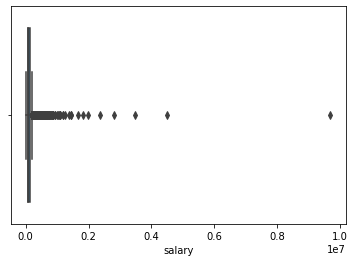

In [ ]:
sns.boxplot(df_kmeans2["salary"])

In [ ]:
# Convertimos a int las categoricals
df_kmeans2['gender_H'] = df_kmeans2['gender_H'].astype('int')

In [ ]:
df_kmeans2.head()

,age,salary,Population_region,gender_H,client_since
pk_unico,,,,,
101603120190528,24,50327.01,389558,0,1474
101738020190528,28,239461.89,6751251,0,1465
101512220190528,26,180141.00,6751251,1,1480
101142720190528,24,357406.05,6751251,1,1510
100373620190528,26,163699.20,6751251,1,1578


In [ ]:
"""def OHE(dataframe, col_name):
  _dummy_dataset = pd.get_dummies(dataframe[col_name], prefix = col_name)
  dataframe = pd.concat([dataframe,_dummy_dataset], axis = 1)
  return dataframe.drop([col_name], axis =1)"""

'def OHE(dataframe, col_name):\n  _dummy_dataset = pd.get_dummies(dataframe[col_name], prefix = col_name)\n  dataframe = pd.concat([dataframe,_dummy_dataset], axis = 1)\n  return dataframe.drop([col_name], axis =1)'

In [ ]:
#lista_categoricas_nom = ['segment']

In [ ]:
'''for i in lista_categoricas_nom:
  num_etiquetas = len(df_kmeans2[i].value_counts())
  print(num_etiquetas)
  print(i)
  df_kmeans2 = OHE(df_kmeans2, i)'''

'for i in lista_categoricas_nom:\n  num_etiquetas = len(df_kmeans2[i].value_counts())\n  print(num_etiquetas)\n  print(i)\n  df_kmeans2 = OHE(df_kmeans2, i)'

In [ ]:
df_kmeans2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 101603120190528 to 112797620190528
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10000 non-null  int64  
 1   salary             10000 non-null  float64
 2   Population_region  10000 non-null  int64  
 3   gender_H           10000 non-null  int64  
 4   client_since       10000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 468.8 KB


In [ ]:
# Upper bound
#upper = np.where(df_kmeans_without_duplicated['sum_revenue'] >= (Q3+1.5*IQR))

In [ ]:
#df_kmeans_without_duplicated[df_kmeans_without_duplicated['sum_revenue'] >= (Q3+1.5*IQR)]

In [ ]:
# Lower bound
#lower = np.where(df_kmeans_without_duplicated['sum_revenue'] <= (Q1-1.5*IQR))

In [ ]:
#df_kmeans_without_duplicated[(df_kmeans_without_duplicated['sum_revenue'] <= (Q1-1.5*IQR))]

In [ ]:
 #''' Removing the Outliers '''
#df_kmeans_without_duplicated.drop(upper[0], inplace = True)
#df_kmeans_without_duplicated.drop(lower[0], inplace = True)
 
#print("New Shape: ", df_kmeans_without_duplicated.shape)

In [ ]:
correlaciones = df_kmeans2.corr()

In [ ]:
correlaciones.style.background_gradient(cmap='coolwarm')

,age,salary,Population_region,gender_H,client_since
age,1.000000,0.042261,0.050971,0.009816,0.017112
salary,0.042261,1.000000,0.175478,0.033468,0.011011
Population_region,0.050971,0.175478,1.000000,0.073224,0.021024
gender_H,0.009816,0.033468,0.073224,1.000000,-0.021886
client_since,0.017112,0.011011,0.021024,-0.021886,1.000000


In [ ]:
from sklearn.cluster import KMeans
import time

In [ ]:
CALCULATE_ELBOW = True

if CALCULATE_ELBOW:
    st = time.time()

    sse = {}

    for k in range(2, 15):

        print(f"Fitting pipe with {k} clusters")
        cluster_model = KMeans(n_clusters = k)
        cluster_model.fit(df_kmeans2)

        sse[k] = cluster_model.inertia_

    et = time.time()
    print("Elbow curve took {} minutes.".format(round((et - st)/60), 2))

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters
Elbow curve took 0 minutes.


In [ ]:
import matplotlib.pyplot as plt

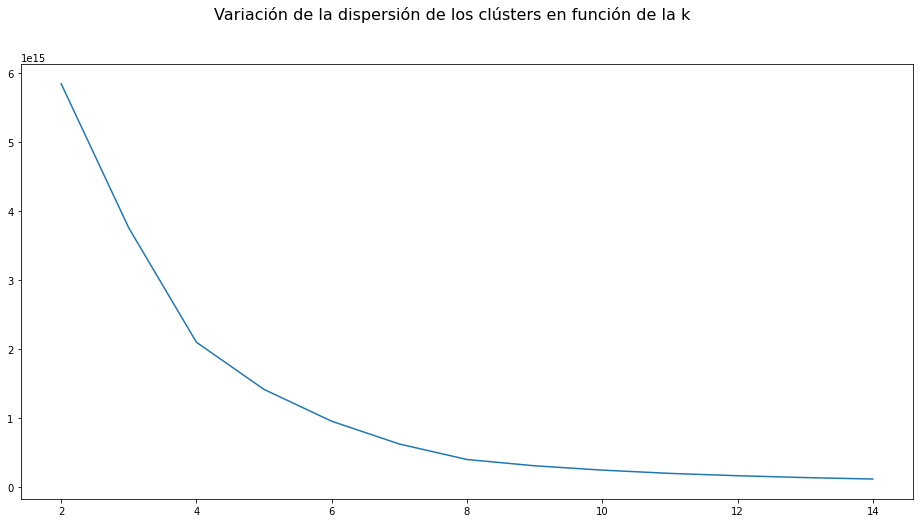

In [ ]:
if CALCULATE_ELBOW:
    fig = plt.figure(figsize = (16, 8))
    ax = fig.add_subplot()

    x_values = list(sse.keys())
    y_values = list(sse.values())

    ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
    fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

In [ ]:
#FALTA REVISAR TEMA DE OUTLIERS

standard_scaler = StandardScaler()
scaled_df = standard_scaler.fit_transform(df_kmeans2)
scaled_df = pd.DataFrame(scaled_df, index = df_kmeans2.index, columns = df_kmeans2.columns)

In [ ]:
cluster_model = KMeans(n_clusters = 4)
cluster_model.fit(scaled_df)

KMeans(n_clusters=4)

In [ ]:
labels = cluster_model.predict(scaled_df)

In [ ]:
df_kmeans2["cluster"] = labels

In [ ]:
df_kmeans2.shape

(10000, 6)

In [ ]:
#TARDA MUCHO
#selected_columns = ['last_purchase', 'sum_revenue', 'total_servicios_max','total_ahorro_inv_max','total_fincanciacion_max','client_since']
#sns.pairplot(df_kmeans_without_duplicated, vars = selected_columns, hue = 'cluster')

In [ ]:
ficha_df = pd.DataFrame()
ficha_df

""


In [ ]:
df_kmeans2.columns

Index(['age', 'salary', 'Population_region', 'gender_H', 'client_since',
       'cluster'],
      dtype='object')

In [ ]:
df_kmeans2[df_kmeans2['cluster'] == 2]

,age,salary,Population_region,gender_H,client_since,cluster
pk_unico,,,,,,
111791220190528,58,70536.03,6751251,1,1230,2
111780420190528,74,67848.84,5714730,1,1233,2
111805420190528,60,87707.70,1120134,1,1230,2
111800720190528,75,82246.86,627190,1,1230,2
111805920190528,68,233834.79,6751251,1,1230,2
...,...,...,...,...,...,...
112809420190528,77,112570.83,5714730,0,1137,2
112812920190528,86,158813.85,6751251,1,1137,2
112816920190528,74,164981.52,6751251,0,1137,2


In [ ]:
for i, col in enumerate([ 'age', 'salary', 'Population_region','client_since','gender_H']):
    resumen_data = df_kmeans2[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = ficha_df.append(resumen_data)

In [ ]:
resumen_data

cluster          0         1         2    3
gender_H mean  1.0  0.004898  0.541667  0.0
         std   0.0  0.069827  0.498497  0.0
         min   1.0  0.000000  0.000000  0.0
         25%   1.0  0.000000  0.000000  0.0
         50%   1.0  0.000000  1.000000  0.0
         75%   1.0  0.000000  1.000000  0.0
         max   1.0  1.000000  1.000000  0.0

In [ ]:
# generamos nuestro multiindex
out_index = [
    'Mobile',
    'Demograficas',
    'Monetarias',
    'Demograficas',
    'Demograficas'     
]

inner_index = [
    
    'age', 
    'salary', 
    'Population_region',
    'client_since',
    'gender_H',
    ]

estadisticos = ["Media", "Desviación", "Mínimo", "Perc. 25", "Perc. 50", "Perc. 75", "Máximo"]

new_multi_index = []

for oi, ii, in zip(out_index, inner_index):
    for es in estadisticos:
        new_multi_index.append((oi, ii, es))
        
new_multi_index

[('Mobile', 'age', 'Media'),
 ('Mobile', 'age', 'Desviación'),
 ('Mobile', 'age', 'Mínimo'),
 ('Mobile', 'age', 'Perc. 25'),
 ('Mobile', 'age', 'Perc. 50'),
 ('Mobile', 'age', 'Perc. 75'),
 ('Mobile', 'age', 'Máximo'),
 ('Demograficas', 'salary', 'Media'),
 ('Demograficas', 'salary', 'Desviación'),
 ('Demograficas', 'salary', 'Mínimo'),
 ('Demograficas', 'salary', 'Perc. 25'),
 ('Demograficas', 'salary', 'Perc. 50'),
 ('Demograficas', 'salary', 'Perc. 75'),
 ('Demograficas', 'salary', 'Máximo'),
 ('Monetarias', 'Population_region', 'Media'),
 ('Monetarias', 'Population_region', 'Desviación'),
 ('Monetarias', 'Population_region', 'Mínimo'),
 ('Monetarias', 'Population_region', 'Perc. 25'),
 ('Monetarias', 'Population_region', 'Perc. 50'),
 ('Monetarias', 'Population_region', 'Perc. 75'),
 ('Monetarias', 'Population_region', 'Máximo'),
 ('Demograficas', 'client_since', 'Media'),
 ('Demograficas', 'client_since', 'Desviación'),
 ('Demograficas', 'client_since', 'Mínimo'),
 ('Demograficas'

In [ ]:
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)  

In [ ]:
#aqui hay que fijarnos en los tamaños de los clusters, cuantos clientes hay por cluster en donde dice Tamaño (si son muy pocos el dice que no sirve)
#tambien fijarnos en aquellos grupos que tienen valores similares y fijarnos en las diferencias entre ellos para describirlos mejor.
#ver en donde tiene mas peso cada cluster, lo que est en azul oscuro nos va a decir eso, por ejemplo los mas antiguos, los que mas productos tienen, etc.

In [ ]:
ficha_df.head(42)

cluster                            0             1             2             3
age               mean  4.083041e+01  4.259929e+01  7.038636e+01  4.236470e+01
                  std   7.294064e+00  8.068564e+00  9.425707e+00  8.086262e+00
                  min   2.000000e+01  2.100000e+01  5.400000e+01  2.000000e+01
                  25%   3.500000e+01  3.600000e+01  6.300000e+01  3.600000e+01
                  50%   4.000000e+01  4.200000e+01  6.800000e+01  4.100000e+01
                  75%   4.600000e+01  4.800000e+01  7.600000e+01  4.800000e+01
                  max   6.000000e+01  6.400000e+01  9.900000e+01  6.600000e+01
salary            mean  1.120489e+05  1.506435e+05  1.339353e+05  8.983644e+04
                  std   8.126904e+04  2.737081e+05  1.069644e+05  4.847606e+04
                  min   1.469028e+04  1.360125e+04  2.161980e+04  1.025421e+04
                  25%   6.970524e+04  8.661506e+04  7.978176e+04  6.336516e+04
                  50%   8.865465e+04  1.111481e+05  9.787059e+04  8.865465e+04
                  75%   1.283879e+05  1.643383e+05  1.553760e+05  9.889761e+04
                  max   1.016498e+06  9.686020e+06  1.443704e+06  7.477259e+05
Population_region mean  3.685851e+06  6.606017e+06  4.164291e+06  1.175609e+06
                  std   2.734184e+06  1.089228e+06  2.758112e+06  6.946675e+05
                  min   8.351700e+04  4.517060e+05  8.874700e+04  8.351700e+04
                  25%   1.044405e+06  6.751251e+06  1.128539e+06  5.870640e+05
                  50%   2.589312e+06  6.751251e+06  5.714730e+06  1.044405e+06
                  75%   6.751251e+06  6.751251e+06  6.751251e+06  1.695651e+06
                  max   9.002488e+06  3.961349e+07  6.751251e+06  2.995211e+06
client_since      mean  1.181137e+03  1.190449e+03  1.200001e+03  1.183141e+03
                  std   9.016381e+01  9.372975e+01  8.721438e+01  8.979362e+01
                  min   4.270000e+02  1.090000e+02  7.850000e+02  2.520000e+02
                  25%   1.108000e+03  1.115000e+03  1.131000e+03  1.113000e+03
                  50%   1.179000e+03  1.191000e+03  1.205500e+03  1.186000e+03
                  75%   1.251000e+03  1.262000e+03  1.277000e+03  1.254000e+03
                  max   1.582000e+03  1.606000e+03  1.599000e+03  1.607000e+03
gender_H          mean  1.000000e+00  4.897596e-03  5.416667e-01  0.000000e+00
                  std   0.000000e+00  6.982679e-02  4.984970e-01  0.000000e+00
                  min   1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
                  25%   1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
                  50%   1.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00
                  75%   1.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00
                  max   1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00

In [ ]:
names = ["Grupo Indicadores", "Indicador", "Estadístico"]
index_ficha = generate_multiindex(new_multi_index, names)
ficha_df.set_index(index_ficha, inplace = True)

In [ ]:
tamaño_clusters = df_kmeans2.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Tamaño")] , names), inplace = True)

In [ ]:
ficha_df = tamaño_clusters.append(ficha_df)

In [ ]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

Descripción clusters:
0. Se caracteriza por tener la última compra realizada hace más tiempo, es decir, son un cluster inactivo. 
Además, son los clientes con mayor antigüedad. 
Además, tienen bastantes productos de servicios y algunos de financiación en comparación al resto de los clusters (TOP 4)

1. Se caracteriza por tener una media bastante alta de productos de financiación
 y algo tiene de servicios.

2. Se caracteriza por ser los que generan más revenues, 
tienen más productos de servicios y de financiación y también de inversiones (junto con otros) 
y tienen una media relativamente alta de antigüedad (TOP 1)

3. Se caracterizan porque son de los que tienen su última compra con mayor antigüedad, es decir, inactivos.

4. Se caracterizan porque son los terceros con media de revenue más alta, 
tienen muchos productos de inversión y bastantes productos de servicios (TOP 3)

5. Se caracterizan por tener muchos productos de servicios (y una maxima alta de antigüedad de clientes) (TOP 4)

6. Se caracteriza por ser los segundos que más revenue generan, 
los que tienen media más alta de productos de inversión 
y de las más altas de servicios, con una media bastante alta de antigüedad de clientes. (TOP 2)
